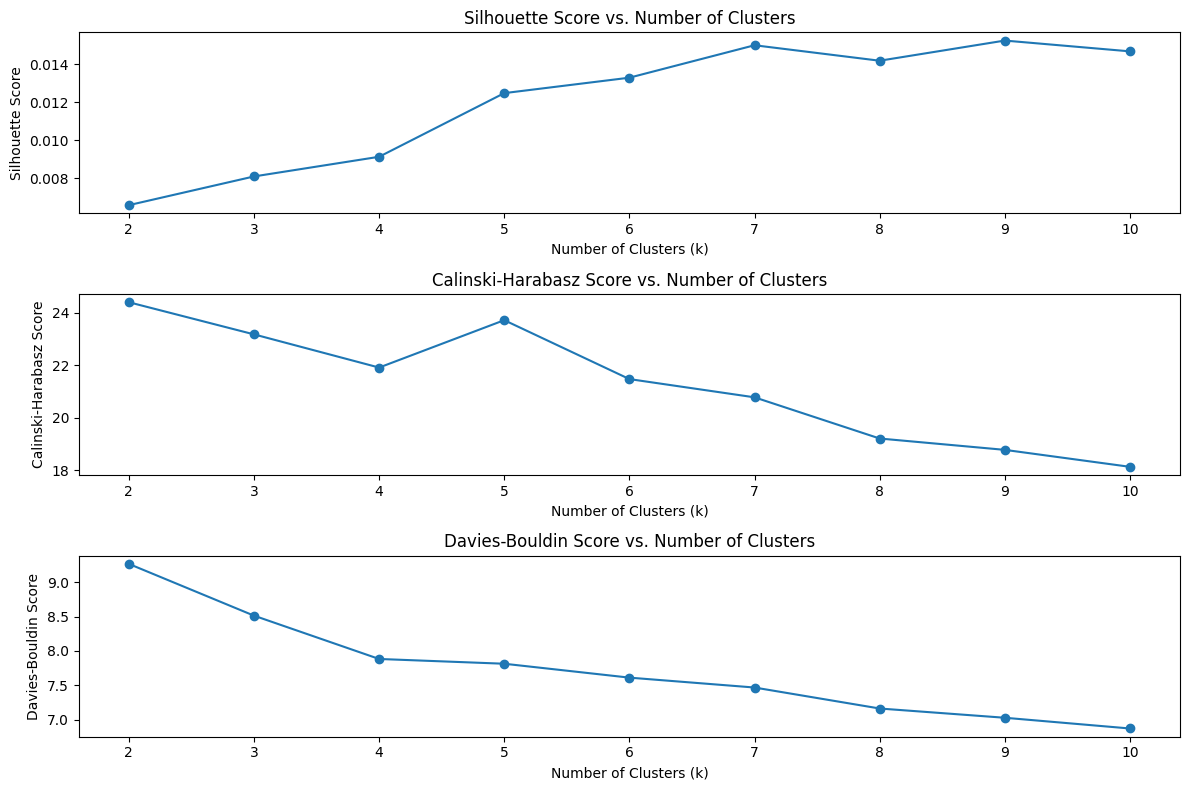

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to load the data from Excel
def load_data(file_path):
    df = pd.read_excel(file_path)
    english_texts = df['ENGLISH'].astype(str).values  # Convert all values to strings
    return english_texts

# Function to convert text data to numerical features using TF-IDF
def vectorize_text(texts):
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(texts).toarray()  # Convert text to TF-IDF feature vectors
    return x

# Function to perform K-means clustering and calculate metrics
def kmeans_metrics(data, k_values):
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        labels = kmeans.labels_

        # Calculate metrics
        silhouette_avg = silhouette_score(data, labels) if k > 1 else float('nan')
        calinski_harabasz = calinski_harabasz_score(data, labels) if k > 1 else float('nan')
        davies_bouldin = davies_bouldin_score(data, labels) if k > 1 else float('nan')

        silhouette_scores.append(silhouette_avg)
        calinski_scores.append(calinski_harabasz)
        davies_bouldin_scores.append(davies_bouldin)

    return silhouette_scores, calinski_scores, davies_bouldin_scores

# Main function to execute the code
def main():
    # Load the data from 'Book1.xlsx'
    file_path = 'Book1.xlsx'
    english_texts = load_data(file_path)

    # Convert text to numerical features using TF-IDF
    x = vectorize_text(english_texts)

    # Define the range of k values to test
    k_values = range(2, 11)  # Example range of k values

    # Perform K-means clustering and calculate metrics
    silhouette_scores, calinski_scores, davies_bouldin_scores = kmeans_metrics(x, k_values)

    # Plot the metrics
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.subplot(3, 1, 2)
    plt.plot(k_values, calinski_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')

    plt.subplot(3, 1, 3)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Score')

    plt.tight_layout()
    plt.show()

# Call the main function
if __name__ == "__main__":
    main()
